### 데이터 불러오기 및 전처리

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
type_1 = pd.read_csv('/content/drive/Shareddrives/[GH x RiderDash]/Data/Warranty_type1.csv')
type_2 = pd.read_csv('/content/drive/Shareddrives/[GH x RiderDash]/Data/Warranty_type2.csv')
type_3 = pd.read_csv('/content/drive/Shareddrives/[GH x RiderDash]/Data/Warranty_type3.csv')
total_df = pd.concat([type_1, type_2, type_3]) # type 1, 2, 3 하나로 합친 df
total_df.head()

,regist_dt,car,store,store_addr,price,pay_kind,by_dealer,product_1,product_2,product_3,product_4,product_5,product_6
0,2.020120e+13,렉스턴,21312de55841d2c624d4873b1f13d1f5,서울 영등포구,650000,1,0,101.0,101.0,101.0,101.0,102.0,101.0
1,2.020120e+13,K7,bb6a02da9253f463cbbdecf49352246a,대덕구 중리동,500000,1,0,85.0,85.0,NaN,85.0,87.0,NaN
2,2.020120e+13,투싼,f87010f9e1357101908204837a9f05fd,경남 창원시,500000,1,0,284.0,284.0,284.0,284.0,285.0,NaN
3,2.020120e+13,기아 4세대 카니발 KA4,3b1de9448312d7ae5811d04787b27fb9,전북 익산시,700000,2,0,84.0,84.0,NaN,84.0,87.0,NaN
4,2.020120e+13,QM6,5fb9e60a3686436567a032d93539f07c,인천광역시 부평구,500000,1,0,284.0,284.0,NaN,284.0,285.0,NaN


In [ ]:
car_df = pd.read_csv('/content/drive/Shareddrives/[GH x RiderDash]/Data/Preprocessing/cars.csv')
total_df = total_df.merge(car_df[['car', 'manufacturer', 'model']], on = 'car', how = 'left')
'''
type 1, 2, 3 따로보고 싶을 경우 merge
type_1 = type_1.merge(car_df[['car', 'manufacturer', 'model']], on = 'car', how = 'left')
type_2 = type_2.merge(car_df[['car', 'manufacturer', 'model']], on = 'car', how = 'left')
type_3 = type_3.merge(car_df[['car', 'manufacturer', 'model']], on = 'car', how = 'left')
'''
total_df.head()

,regist_dt,car,store,store_addr,price,pay_kind,by_dealer,product_1,product_2,product_3,product_4,product_5,product_6,manufacturer,model
0,2.020120e+13,렉스턴,21312de55841d2c624d4873b1f13d1f5,서울 영등포구,650000,1,0,101.0,101.0,101.0,101.0,102.0,101.0,쌍용,렉스턴
1,2.020120e+13,K7,bb6a02da9253f463cbbdecf49352246a,대덕구 중리동,500000,1,0,85.0,85.0,NaN,85.0,87.0,NaN,기아,K7
2,2.020120e+13,투싼,f87010f9e1357101908204837a9f05fd,경남 창원시,500000,1,0,284.0,284.0,284.0,284.0,285.0,NaN,현대,투싼
3,2.020120e+13,기아 4세대 카니발 KA4,3b1de9448312d7ae5811d04787b27fb9,전북 익산시,700000,2,0,84.0,84.0,NaN,84.0,87.0,NaN,기아,카니발
4,2.020120e+13,QM6,5fb9e60a3686436567a032d93539f07c,인천광역시 부평구,500000,1,0,284.0,284.0,NaN,284.0,285.0,NaN,르노삼성,QM6


### 조건 선택 시 가격분포 생성 함수 작성

In [ ]:
def Price_Dist(df, model, store, dealer, product):
  condition_1 = True; condition_2 = True; condition_3 = True; condition_4 = True
  if model: condition_1 = df['model'] == model
  if store: condition_2 = df['store'] == store
  if (dealer == 0) | (dealer == 1): condition_3 = df['by_dealer'] == dealer
  if product:
    for i in range(6):
      if product[i]:
        col = 'product_%d' % (i + 1)
        condition_4 = (condition_4) & (df[col] == product[i])
  prices = df.loc[(condition_1) & (condition_2) & (condition_3) & (condition_4), 'price']
  print(prices.describe())
  plt.hist(prices, bins = 20, color = 'green', alpha = 0.3)
  plt.show()

count       687.000000
mean     526439.592431
std       54134.688457
min      160000.000000
25%      520000.000000
50%      520000.000000
75%      550000.000000
max      780000.000000
Name: price, dtype: float64


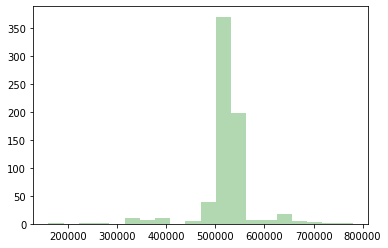

In [ ]:
Price_Dist(total_df, '투싼', None, 0, [284, None, None, None, None, None])